# Домашнее задание "Случайные величины и вероятности".
# Уровень 0:
# Задание 1
В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [1]:
import numpy as np

In [2]:
p_a1 = 0.2
p_a2 = 0.3
p_a3 = 0.5

p_b_a1 = 0.1
p_b_a2 = 0.05
p_b_a3 = 0.2

In [3]:
p_b = p_a1*p_b_a1 + p_a2*p_b_a2 + p_a3*p_b_a3
p_b

0.135

# Задание 2
Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

Легко проверить, что любые два события из этого набора независимы. Все же три в совокупности зависимы, ибо зная, например, что события $A_{1} и  A_{2}$ произошли, мы знаем точно, что $A_{3}$ также произошло. Более формально: ${\displaystyle \mathbb {P} (A_{i}\cap A_{j})={\frac {1}{4}}={\frac {1}{2}}\cdot {\frac {1}{2}}=\mathbb {P} (A_{i})\cdot \mathbb {P} (A_{j})\quad \forall i\neq j}\mathbb {P} (A_{i}\cap A_{j})={\frac {1}{4}}={\frac {1}{2}}\cdot {\frac {1}{2}}=\mathbb {P} (A_{i})\cdot \mathbb {P} (A_{j})\quad \forall i\neq j. С другой стороны, {\displaystyle \mathbb {P} (A_{1}\cap A_{2}\cap A_{3})={\frac {1}{4}}\neq {\frac {1}{2}}\cdot {\frac {1}{2}}\cdot {\frac {1}{2}}=\mathbb {P} (A_{1})\cdot \mathbb {P} (A_{2})\cdot \mathbb {P} (A_{3})}\mathbb {P} (A_{1}\cap A_{2}\cap A_{3})={\frac {1}{4}}\neq {\frac {1}{2}}\cdot {\frac {1}{2}}\cdot {\frac {1}{2}}=\mathbb {P} (A_{1})\cdot \mathbb {P} (A_{2})\cdot \mathbb {P} (A_{3})$

https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B7%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_(%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9)

In [7]:
(1/2 * 1/2, 1/2 * 1/2 * 1/2)

(0.25, 0.125)

In [6]:
1/2 * 1/2 == 1/2 * 1/2 * 1/2

False

# Уровень 1:
# Задание 3
Изучите 3 распределения из библиотеки scipy: Нормальное, Экспоненциальное, Стьюдента. 

Используя функцию плотности распредления (pdf), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения.

Дополнительная информация [тут](https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html).

In [8]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

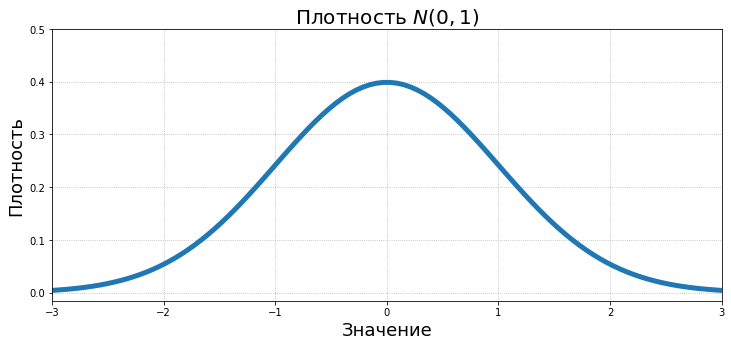

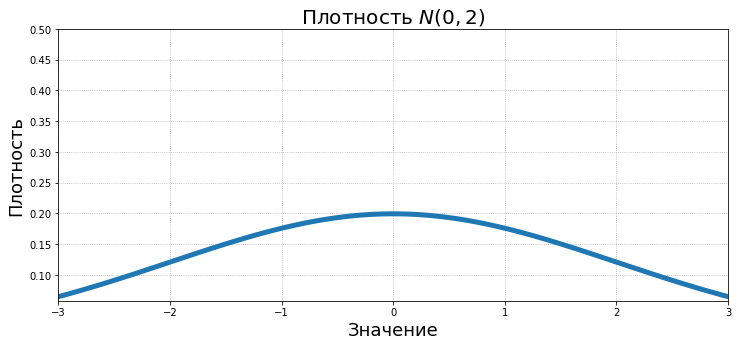

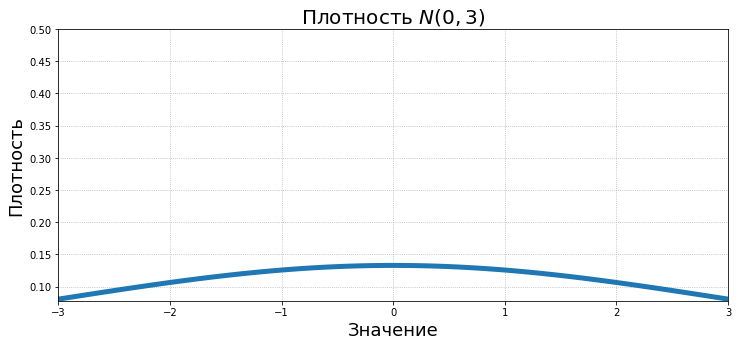

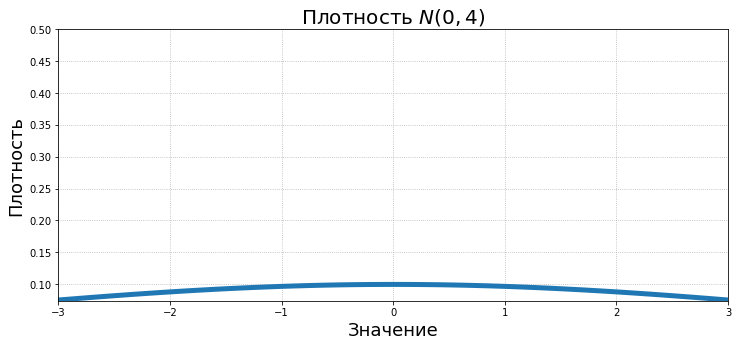

In [36]:
for i in range(1,5):
  show_pdf(
      pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=0.5, grid_size=100, 
      distr_name=r'$N({loc}, {scale})$', loc=0, scale=i
  )

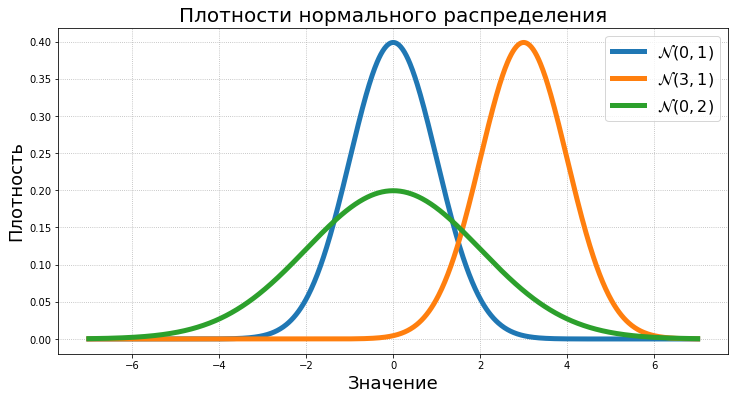

In [17]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
loc_values = [0, 3, 0]  # набор значений параметра a
sigma_values = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 6))

for i, (a, sigma) in enumerate(zip(loc_values, sigma_values)):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), lw=5, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))

plt.legend(fontsize=16)
plt.title('Плотности нормального распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.grid(ls=':')
plt.show()

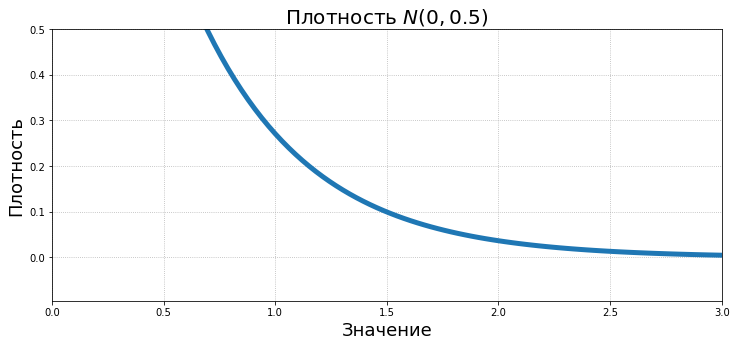

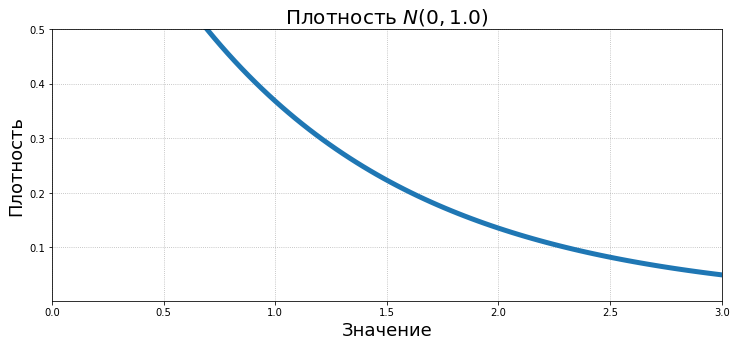

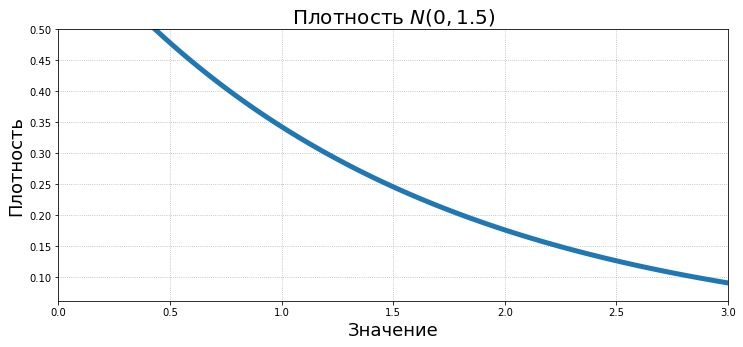

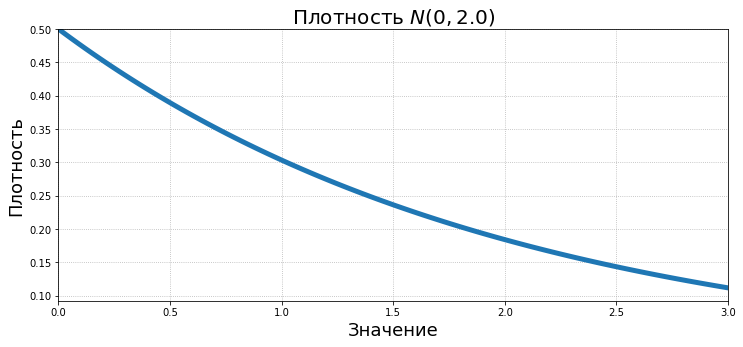

In [24]:
for i in range(1,5):
  show_pdf(
      pdf=sps.expon.pdf, xmin=0, xmax=3, ymax=0.5, grid_size=100, 
      distr_name=r'$N({loc}, {scale})$', loc=0, scale=i/2
  )

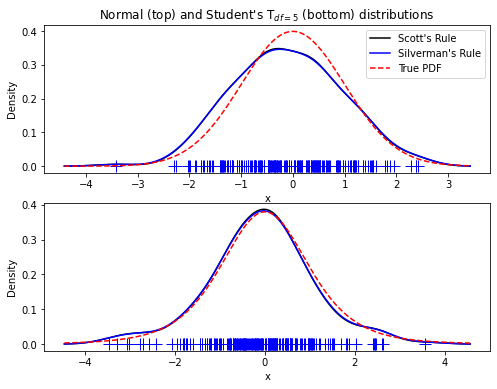

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


np.random.seed(12456)
x1 = np.random.normal(size=200)  # random data, normal distribution
xs = np.linspace(x1.min()-1, x1.max()+1, 200)

kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(211)
ax1.plot(x1, np.zeros(x1.shape), 'b+', ms=12)  # rug plot
ax1.plot(xs, kde1(xs), 'k-', label="Scott's Rule")
ax1.plot(xs, kde2(xs), 'b-', label="Silverman's Rule")
ax1.plot(xs, stats.norm.pdf(xs), 'r--', label="True PDF")

ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title("Normal (top) and Student's T$_{df=5}$ (bottom) distributions")
ax1.legend(loc=1)

x2 = stats.t.rvs(5, size=200)  # random data, T distribution
xs = np.linspace(x2.min() - 1, x2.max() + 1, 200)

kde3 = stats.gaussian_kde(x2)
kde4 = stats.gaussian_kde(x2, bw_method='silverman')

ax2 = fig.add_subplot(212)
ax2.plot(x2, np.zeros(x2.shape), 'b+', ms=12)  # rug plot
ax2.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax2.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax2.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")

ax2.set_xlabel('x')
ax2.set_ylabel('Density')

plt.show()

Добрый день, Алексей!

Спасибо за выполненное задание.

Уровень 0 - Верно!

Уровень 1 - Верно! Для р. Стьюдента можно было аналогично предшествующим построить.

Отличная работа!

Зачёт!

Если остались вопросы, с удовольствием отвечу на них в личных сообщениях.

Удачи в дальнейшей учёбе!